In [20]:
import os
from util.eval_utils import concat_path, get_project_root_directory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Security Level Adaptation Times UC-2

In [21]:

# Adjusted directory path

directory_path = concat_path(get_project_root_directory(), 'eval', 'raw', 'sec-level-adaptations-uc-2', 'cleaned')

df = pd.DataFrame()
df_temp = pd.DataFrame()

# Iterate through all files in the directory
for file_name in os.listdir(directory_path):

    if file_name.endswith(".csv"):  # Ensure we're processing csv files

        file_path = concat_path(directory_path, file_name)

        # Extract the identifier from the filename (last number before "_tta_eval")
        identifier = file_name.replace('.csv', '')
        
        df_temp = pd.read_csv(file_path, index_col=0)
        
        df_temp = df_temp.replace(',', '.', regex=True)
        df_temp = df_temp.astype(float)
        
        # Prefix columns with the filename identifier
        df_temp.columns = [f"{identifier}_{col}" for col in df_temp.columns]

        # Append the temporary DataFrame to the main DataFrame
        df = pd.concat([df, df_temp], axis=1)
        

df





,CEO#1_Zeit gesamt,CEO#1_Server bearbeitung,Director#3.2_Zeit gesamt,Director#3.2_Server bearbeitung,Director#3.3_Zeit gesamt,Director#3.3_Server bearbeitung,Manager#4.6_Zeit gesamt,Manager#4.6_Server bearbeitung,M_Dir#2.1_Zeit gesamt,M_Dir#2.1_Server bearbeitung
Nr.,,,,,,,,,,
1,754.3178,404.496,389.313,63.334,466.019,111.267,422.434,104.086,517.256,187.737
2,419.2100,389.351,108.396,93.980,155.337,128.089,91.217,84.176,231.791,218.738
3,449.1640,420.258,95.933,65.548,137.274,110.246,123.688,94.711,245.992,218.496
4,449.1098,419.429,121.490,95.572,123.828,109.431,123.555,94.991,232.070,203.592
5,387.9821,373.632,94.251,66.042,124.323,94.777,123.555,81.348,231.690,202.720
6,402.4741,372.885,120.472,94.299,155.152,141.967,137.127,110.538,247.378,218.718
7,434.3020,419.442,124.412,94.335,123.562,94.818,108.625,95.205,215.417,186.386
8,449.7160,433.942,124.050,95.311,108.041,79.015,108.937,79.526,199.567,170.986
9,418.3898,388.148,108.729,78.410,123.546,94.055,124.239,95.642,261.470,232.562


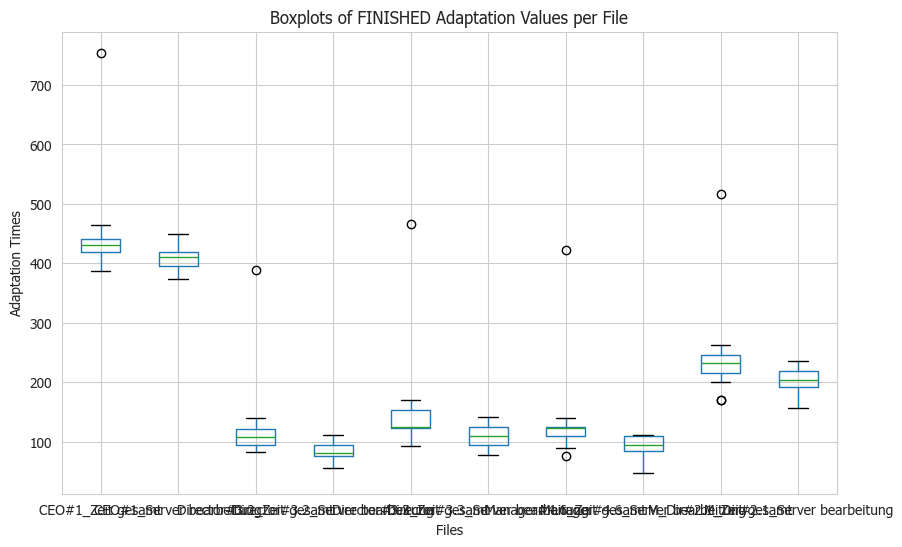

In [22]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

In [23]:
# eliminate the outliers

outliers = {
    'CEO#1_Zeit gesamt': [754.3178],
    'Director#3.2_Zeit gesamt': [389.313],
    'Director#3.3_Zeit gesamt': [466.019],
    'M_Dir#2.1_Zeit gesamt': [517.256],
    'Manager#4.6_Zeit gesamt': [422.434]
}

# Loop through each specified column and remove the outliers
for suffix, values in outliers.items():
    column_name = suffix
    if column_name in df.columns:
        df[column_name] = df[column_name][~df[column_name].isin(values)]

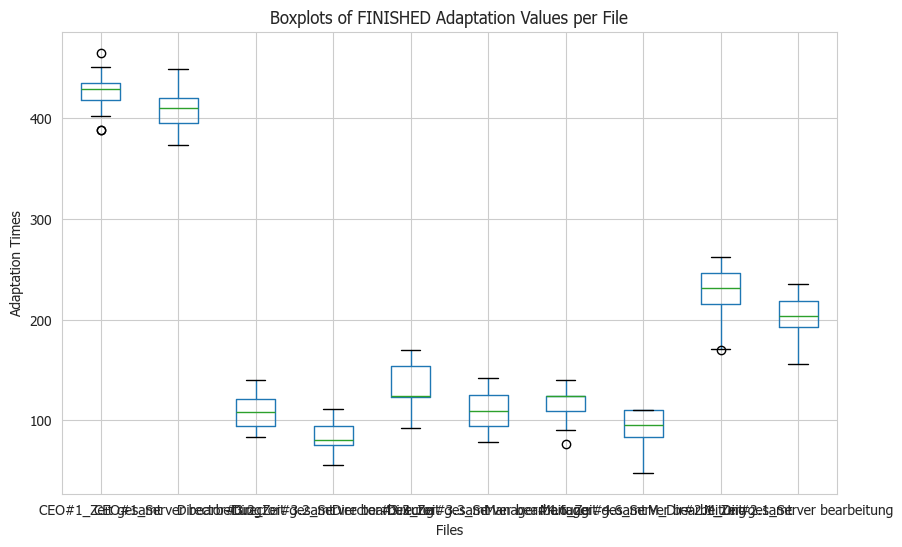

In [24]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

In [29]:
# reorder according to tree
desired_order = [
    'CEO#1_Zeit gesamt',
    'CEO#1_Server bearbeitung',
    'M_Dir#2.1_Zeit gesamt',
    'M_Dir#2.1_Server bearbeitung',
    'Director#3.3_Zeit gesamt',
    'Director#3.3_Server bearbeitung',
    'Director#3.2_Zeit gesamt',
    'Director#3.2_Server bearbeitung',
    'Manager#4.6_Zeit gesamt',
    'Manager#4.6_Server bearbeitung'
]

# Reorder the columns in the DataFrame
df = df[desired_order]
df

,CEO#1_Zeit gesamt,CEO#1_Server bearbeitung,M_Dir#2.1_Zeit gesamt,M_Dir#2.1_Server bearbeitung,Director#3.3_Zeit gesamt,Director#3.3_Server bearbeitung,Director#3.2_Zeit gesamt,Director#3.2_Server bearbeitung,Manager#4.6_Zeit gesamt,Manager#4.6_Server bearbeitung
Nr.,,,,,,,,,,
1,NaN,404.496,NaN,187.737,NaN,111.267,NaN,63.334,NaN,104.086
2,419.2100,389.351,231.791,218.738,155.337,128.089,108.396,93.980,91.217,84.176
3,449.1640,420.258,245.992,218.496,137.274,110.246,95.933,65.548,123.688,94.711
4,449.1098,419.429,232.070,203.592,123.828,109.431,121.490,95.572,123.555,94.991
5,387.9821,373.632,231.690,202.720,124.323,94.777,94.251,66.042,123.555,81.348
6,402.4741,372.885,247.378,218.718,155.152,141.967,120.472,94.299,137.127,110.538
7,434.3020,419.442,215.417,186.386,123.562,94.818,124.412,94.335,108.625,95.205
8,449.7160,433.942,199.567,170.986,108.041,79.015,124.050,95.311,108.937,79.526
9,418.3898,388.148,261.470,232.562,123.546,94.055,108.729,78.410,124.239,95.642


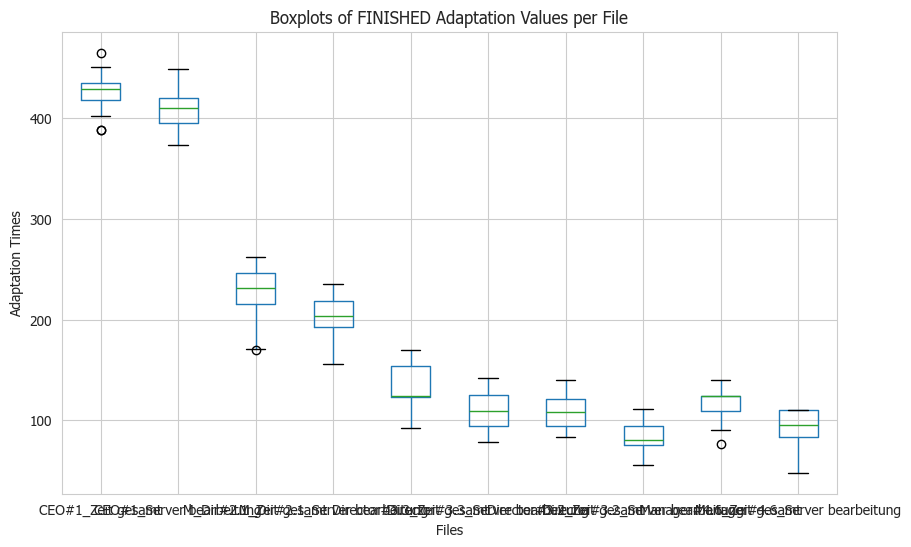

In [30]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

C:\Users\mstad\AppData\Local\Temp\ipykernel_17504\1069083539.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


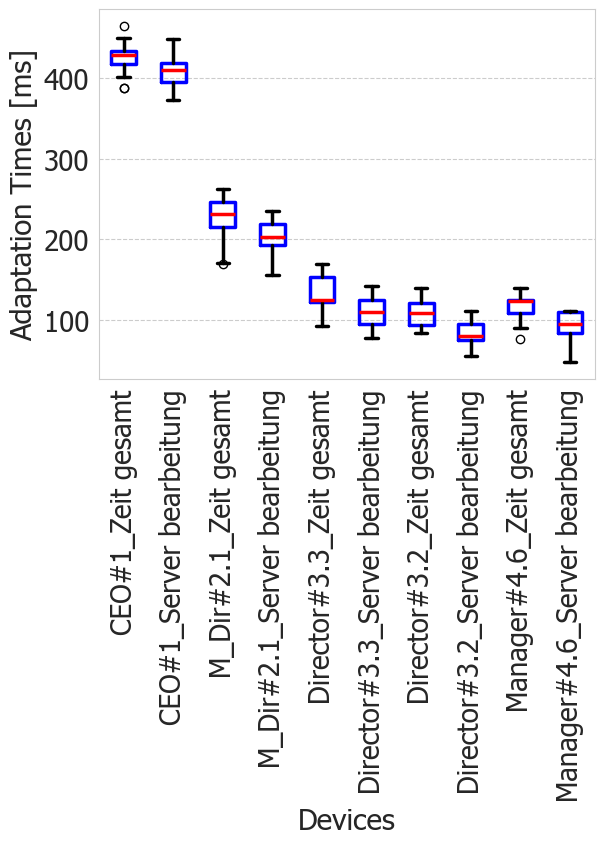

In [31]:
from util.utils import generate_timestamp_for_filename

# Copy and rename the DataFrame for plotting
df_plot = df.copy()

# # Define a dictionary mapping old column names to new ones
# new_column_names = {
#     '192.168.56.24': '#24',
#     '192.168.56.30': '#30',
#     '192.168.56.31': '#31',
#     '192.168.56.23': '#23',
#     '192.168.56.28': '#28',
#     '192.168.56.32': '#32',
#     '192.168.56.33': '#33'
# }

# # Rename the columns in the DataFrame
# df_plot.rename(columns=new_column_names, inplace=True)

# Set a more modern and professional style using seaborn
plt.rc('font', family='Tahoma')

# Create the boxplot
boxplot = df_plot.boxplot(
                          # figsize=(10, 4),
                          grid=False,
                          boxprops=dict(color="blue", linewidth=2.5),
                          whiskerprops=dict(linewidth=2.5),
                          capprops=dict(linewidth=2.5),
                          medianprops=dict(color="red", linewidth=2.5))
# boxplot = df_plot.boxplot(figsize=(12, 8), grid=False, 
#     boxprops=dict(color="steelblue", linewidth=2.5),  # Softer blue
#                           whiskerprops=dict(color="skyblue", linewidth=2.5),  # Light sky blue
#                           capprops=dict(color="deepskyblue", linewidth=2.5),  # Deep sky blue for contrast
#                           medianprops=dict(color="coral", linewidth=2.5)  # Warm coral for the median
#                           )

# Customize font sizes
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Adaptation Times [ms]", fontsize=21)
plt.xlabel("Devices", fontsize=21)

# Add a subtle grid for the y-axis only
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.tight_layout()

plt.savefig(concat_path(get_project_root_directory(), 'eval', 'out',
                        f'{generate_timestamp_for_filename()}_boxplot_uc_1_sec_lvl_adaptations_v1.pdf'), format='pdf',
            bbox_inches='tight')
plt.show()

In [32]:
# Calculate quartiles, minimum, and maximum for each column
summary_stats = df.describe().T[["min", "25%", "50%", "75%", "max"]]

# Rename columns for clarity
summary_stats.rename(columns={
    "min": "Minimum",
    "25%": "Q1 (25%)",
    "50%": "Median (50%)",
    "75%": "Q3 (75%)",
    "max": "Maximum"
}, inplace=True)

# Print the summary statistics
print(summary_stats)

                                 Minimum    Q1 (25%)  Median (50%)  \
CEO#1_Zeit gesamt                387.937  418.380275      428.9620   
CEO#1_Server bearbeitung         372.885  394.968500      410.1410   
M_Dir#2.1_Zeit gesamt            169.791  215.862000      231.6365   
M_Dir#2.1_Server bearbeitung     156.055  192.730000      203.1210   
Director#3.3_Zeit gesamt          92.227  122.665000      124.4600   
Director#3.3_Server bearbeitung   77.935   94.633000      109.4310   
Director#3.2_Zeit gesamt          83.257   94.279750      108.5605   
Director#3.2_Server bearbeitung   55.523   75.442000       80.5950   
Manager#4.6_Zeit gesamt           76.161  108.668750      123.5550   
Manager#4.6_Server bearbeitung    47.775   83.638500       94.9860   

                                   Q3 (75%)  Maximum  
CEO#1_Zeit gesamt                434.645525  465.060  
CEO#1_Server bearbeitung         419.591500  449.251  
M_Dir#2.1_Zeit gesamt            246.208750  262.203  
M_Dir#2.1